# Максим Ляра GPN Intelligence Cup 2023

## Импорт библиотек и данных

In [1]:
! pip install Catboost

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from catboost import CatBoostRegressor

df - Основной dataframe с данными о транзакциях, к которому присоединю остальные \
df2 - Данные о ценах конкурентов \
df3 - Данные о погоде \
df4 - Данные о себестоимости

In [3]:
df = pd.read_parquet("transaction_df.parquet")
df2 = pd.read_parquet("df_competitors.parquet")
df3 = pd.read_parquet("weather_df.parquet")
df4 = pd.read_parquet("df_cost.parquet")

In [4]:
display(df)
print(len(df))
display(df2)
print(len(df2))
display(df3)
print(len(df3))
display(df4)
print(len(df4))

,product,price,amount,place,datetime
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.90,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02 05:33:00
...,...,...,...,...,...
875031,Эстус,9.28,1.079104,Фалькония,2218-09-27 14:50:00
875032,Эстус,9.28,1.580617,Фалькония,2218-09-27 06:16:00
875033,Эстус,9.28,1.738492,Фалькония,2218-09-27 11:14:00
875034,Эстус,9.28,0.430340,Фалькония,2218-09-27 22:24:00


875036


,place,product,competitor,price,date
0,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-04
1,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-05
2,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-06
3,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-09
5,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-11
...,...,...,...,...,...
39451,Фалькония,Эстус,Светлые Души,14.99,2218-09-17
39453,Фалькония,Эстус,Светлые Души,15.36,2218-09-20
39454,Фалькония,Эстус,Светлые Души,15.36,2218-09-22
39455,Фалькония,Эстус,Светлые Души,15.36,2218-09-23


31799


,place,hot,rain,snow,date
0,Фалькония,0,0,0,2216-01-02
1,Анор Лондо,1,0,0,2216-01-02
2,Врата Балдура,0,0,1,2216-01-02
3,Нокрон,0,0,0,2216-01-02
4,Кеджистан,0,0,1,2216-01-02
...,...,...,...,...,...
4995,Фалькония,0,0,0,2218-09-27
4996,Анор Лондо,0,0,1,2218-09-27
4997,Врата Балдура,1,0,0,2218-09-27
4998,Нокрон,0,0,0,2218-09-27


5000


,place,product,cost,date
0,Анор Лондо,Целебные травы,2.07,2216-01-02
1,Анор Лондо,Целебные травы,3.07,2216-01-26
2,Анор Лондо,Целебные травы,3.30,2216-02-12
3,Анор Лондо,Целебные травы,4.04,2216-03-06
4,Анор Лондо,Целебные травы,3.88,2216-03-27
...,...,...,...,...
1112,Фалькония,Эстус,3.10,2218-07-29
1113,Фалькония,Эстус,7.20,2218-08-10
1114,Фалькония,Эстус,3.31,2218-08-27
1115,Фалькония,Эстус,3.26,2218-09-16


1117


## EDA и предобработка

Количество записей в день

<Axes: >

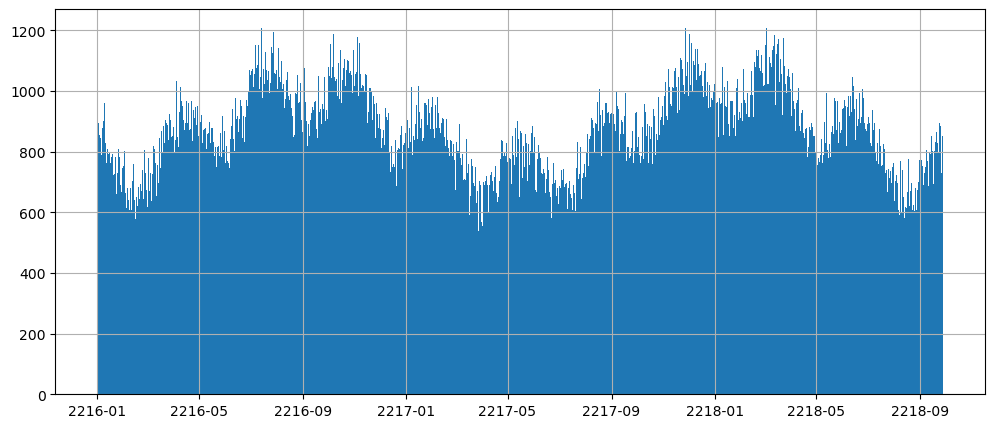

In [5]:
df['datetime'].hist(bins = 1000, figsize=(12,5))

Количество дней в датасете с данными о транзакциях:

In [6]:
df['datetime'].max() - df['datetime'].min()

Timedelta('999 days 23:49:00')

In [7]:
print('Максимальная дата в датасете:', df['datetime'].max())
print('Минимальная дата в датасете:', df['datetime'].min())

Максимальная дата в датасете: 2218-09-27 23:57:00
Минимальная дата в датасете: 2216-01-02 00:08:00


In [8]:
print('Количество строк в df:', len(df))
print('______________')
print('Количество строк с пустыми элементами:')
print(df.isna().sum())

Количество строк в df: 875036
______________
Количество строк с пустыми элементами:
product       0
price         0
amount        0
place       432
datetime      0
dtype: int64


In [9]:
print('Количество строк в df2:', len(df2))
print('______________')
print('Количество строк с пустыми элементами:')
print(df2.isna().sum())

Количество строк в df2: 31799
______________
Количество строк с пустыми элементами:
place         0
product       0
competitor    0
price         0
date          0
dtype: int64


In [10]:
print('Количество строк в df3:', len(df3))
print('______________')
print('Количество строк с пустыми элементами:')
print(df3.isna().sum())

Количество строк в df3: 5000
______________
Количество строк с пустыми элементами:
place    0
hot      0
rain     0
snow     0
date     0
dtype: int64


In [11]:
print('Количество строк в df4:', len(df4))
print('______________')
print('Количество строк с пустыми элементами:')
print(df4.isna().sum())

Количество строк в df4: 1117
______________
Количество строк с пустыми элементами:
place      0
product    0
cost       0
date       0
dtype: int64


In [12]:
df = df.sort_values(by=['product', 'place', 'datetime']).reset_index(drop=True).copy()
df.head()

,product,price,amount,place,datetime
0,Целебные травы,3.9,0.550319,Анор Лондо,2216-01-02 00:49:00
1,Целебные травы,3.9,1.983822,Анор Лондо,2216-01-02 01:55:00
2,Целебные травы,3.9,1.765940,Анор Лондо,2216-01-02 01:58:00
3,Целебные травы,3.9,0.743802,Анор Лондо,2216-01-02 02:01:00
4,Целебные травы,3.9,0.550320,Анор Лондо,2216-01-02 02:30:00


Количество пропусков в данных в разбивке по 10 дней:

<Axes: >

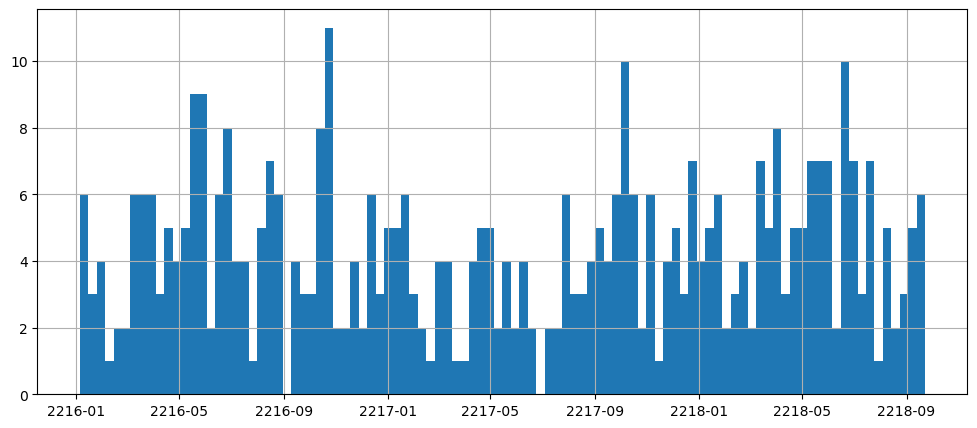

In [13]:
df[df['place'].isna()==True]['datetime'].hist(bins = 100, figsize=(12,5))

Очистка от пропусков:

In [14]:
df = df.dropna().copy()

Распределение цен до обработки данных:

<Axes: >

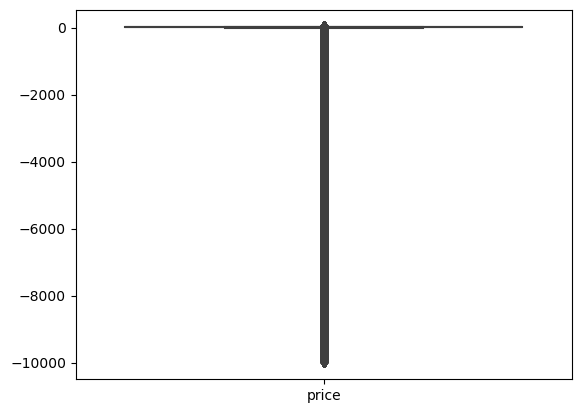

In [15]:
sns.boxplot(df[['price']])

Распределение спроса до обработки данных:

<Axes: >

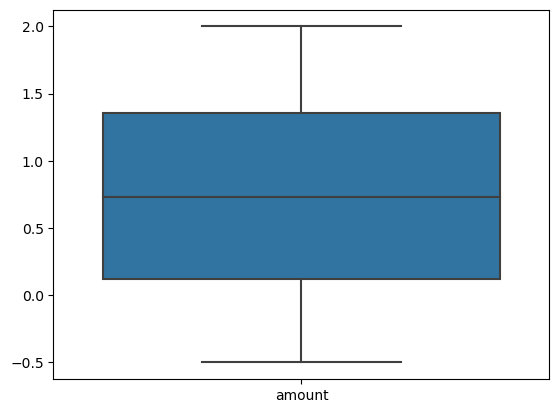

In [16]:
sns.boxplot(df[['amount']])

In [17]:
print('Количество строк до обработки датафрейма:', len(df))

Количество строк до обработки датафрейма: 874604


Визуализация количества физически невозможных значений цены в разбивке по 10 дней:

<Axes: >

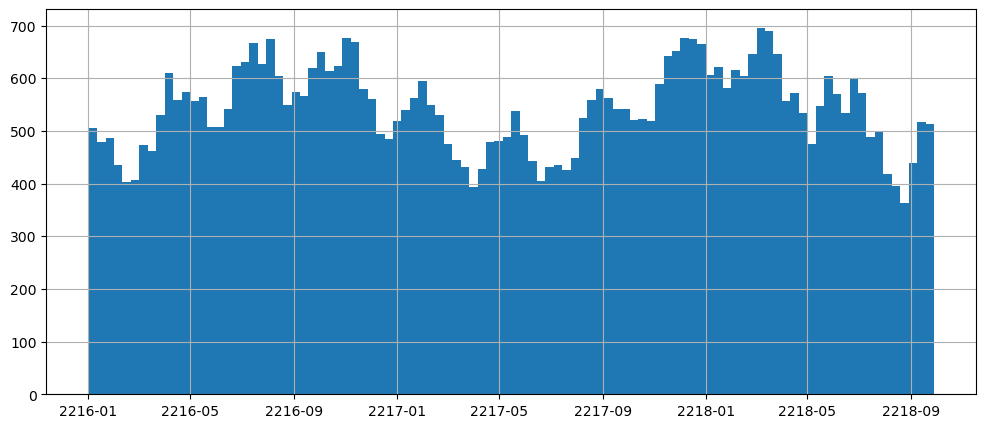

In [18]:
df[df['price']<=0]['datetime'].hist(bins = 100, figsize=(12,5))

Визуализация количества физически невозможных значений спроса в разбивке по 10 дней:

<Axes: >

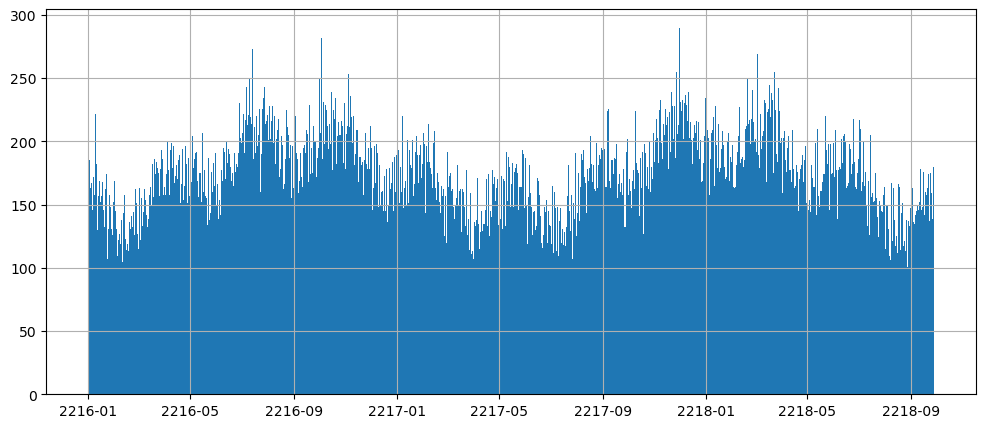

In [19]:
df[df['amount']<=0]['datetime'].hist(bins = 1000, figsize=(12,5))

In [20]:
start_price_df = df[df['price'] < 0]
start_price_df.head()

,product,price,amount,place,datetime
24,Целебные травы,-7154.53,1.988265,Анор Лондо,2216-01-02 13:57:00
31,Целебные травы,-8870.90,1.703059,Анор Лондо,2216-01-02 16:02:00
53,Целебные травы,-7675.59,0.905378,Анор Лондо,2216-01-03 05:34:00
55,Целебные травы,-1481.18,0.254449,Анор Лондо,2216-01-03 05:48:00
73,Целебные травы,-8313.96,0.775686,Анор Лондо,2216-01-03 13:04:00


In [21]:
start_amount_df = df[df['amount'] < 0]
start_amount_df.head()

,product,price,amount,place,datetime
10,Целебные травы,3.9,-0.181400,Анор Лондо,2216-01-02 03:52:00
12,Целебные травы,3.9,-0.302981,Анор Лондо,2216-01-02 04:20:00
18,Целебные травы,3.9,-0.026968,Анор Лондо,2216-01-02 09:32:00
19,Целебные травы,3.9,-0.424848,Анор Лондо,2216-01-02 10:01:00
26,Целебные травы,3.9,-0.209384,Анор Лондо,2216-01-02 14:22:00


In [22]:
df[df.index.isin(range(0, 30))]

,product,price,amount,place,datetime
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00
5,Целебные травы,3.90,0.891872,Анор Лондо,2216-01-02 02:35:00
6,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00
7,Целебные травы,3.90,0.910043,Анор Лондо,2216-01-02 03:06:00
8,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00
9,Целебные травы,3.90,1.644907,Анор Лондо,2216-01-02 03:49:00


In [23]:
# lower_bound = 0
# upper_bound=1000000
# columns = ['price', 'amount']

# for col in columns:
    
#     mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    
#     neg_indices = df.loc[mask, col].index

    
#     df.loc[neg_indices, col] = df[col].rolling(window=5, min_periods=3, center=True).mean().reset_index(drop=True)



In [24]:
less_and_less = df[(df['amount'] <= 0) & (df['price'] <= 0)]['datetime'].count()
less_and_less

10812

In [25]:
was_less_and_less_index = df[(df['amount'] <= 0) & (df['price'] <= 0)].index

In [26]:
was_less_and_less_index

Int64Index([   198,    305,    512,    517,    532,    577,    832,    940,
              1008,   1100,
            ...
            874107, 874115, 874232, 874439, 874443, 874452, 874504, 874696,
            874794, 874834],
           dtype='int64', length=10812)

In [27]:
less_or_less = df[(df['amount'] <= 0) | (df['price'] <= 0)]['datetime'].count()
less_or_less

218945

In [28]:
percent_of_ffill = round(less_and_less/less_or_less*100, 2)

In [29]:
print(f'Заполню {percent_of_ffill}% от всех значений, где price или/и amount меньше 0 предыдущими значениями, остальные {100-percent_of_ffill}% заполню с помощью ML')

Заполню 4.94% от всех значений, где price или/и amount меньше 0 предыдущими значениями, остальные 95.06% заполню с помощью ML


In [30]:
mask = (df['amount'] <= 0) & (df['price'] <= 0)

df.loc[mask, ['amount', 'price']] = np.nan


# Заполните значения предыдущими значениями
df.ffill(inplace=True)


Заполнено значений:

In [31]:
diff_less_and_less = less_and_less - df[(df['amount'] <= 0) & (df['price'] <= 0)]['datetime'].count()
diff_less_and_less

10812

Осталось незаполненных значений типа less_and_less_than_0:

In [32]:
df[(df['amount'] <= 0) & (df['price'] <= 0)]['datetime'].count()

0

Как заполнились пропуски?

In [33]:
for i in was_less_and_less_index[:7]:
    display(df[df.index.isin(range(i-3, i+4))])


,product,price,amount,place,datetime
195,Целебные травы,3.9,1.391700,Анор Лондо,2216-01-06 00:06:00
196,Целебные травы,3.9,0.838019,Анор Лондо,2216-01-06 00:35:00
197,Целебные травы,3.9,1.022115,Анор Лондо,2216-01-06 01:16:00
198,Целебные травы,3.9,1.022115,Анор Лондо,2216-01-06 01:16:00
199,Целебные травы,3.9,-0.224189,Анор Лондо,2216-01-06 01:40:00
200,Целебные травы,3.9,1.997998,Анор Лондо,2216-01-06 01:50:00
201,Целебные травы,3.9,-0.410945,Анор Лондо,2216-01-06 02:17:00


,product,price,amount,place,datetime
302,Целебные травы,3.90,0.709166,Анор Лондо,2216-01-07 13:21:00
303,Целебные травы,3.90,0.914332,Анор Лондо,2216-01-07 13:34:00
304,Целебные травы,3.90,0.464744,Анор Лондо,2216-01-07 14:21:00
305,Целебные травы,3.90,0.464744,Анор Лондо,2216-01-07 14:49:00
306,Целебные травы,-5840.97,1.819570,Анор Лондо,2216-01-07 15:52:00
307,Целебные травы,3.90,0.871173,Анор Лондо,2216-01-07 15:56:00
308,Целебные травы,3.90,1.376852,Анор Лондо,2216-01-07 16:06:00


,product,price,amount,place,datetime
509,Целебные травы,3.9,0.703246,Анор Лондо,2216-01-10 19:59:00
510,Целебные травы,3.9,0.218833,Анор Лондо,2216-01-10 20:26:00
511,Целебные травы,3.9,1.023363,Анор Лондо,2216-01-10 20:26:00
512,Целебные травы,3.9,1.023363,Анор Лондо,2216-01-10 21:18:00
513,Целебные травы,3.9,1.019289,Анор Лондо,2216-01-10 21:40:00
514,Целебные травы,3.9,0.568064,Анор Лондо,2216-01-10 21:57:00
515,Целебные травы,3.9,0.249513,Анор Лондо,2216-01-10 22:01:00


,product,price,amount,place,datetime
514,Целебные травы,3.9,0.568064,Анор Лондо,2216-01-10 21:57:00
515,Целебные травы,3.9,0.249513,Анор Лондо,2216-01-10 22:01:00
516,Целебные травы,3.9,1.385024,Анор Лондо,2216-01-10 22:08:00
517,Целебные травы,3.9,1.385024,Анор Лондо,2216-01-10 22:15:00
518,Целебные травы,3.9,1.155193,Анор Лондо,2216-01-10 22:17:00
519,Целебные травы,3.9,1.770382,Анор Лондо,2216-01-10 22:17:00
520,Целебные травы,3.9,-0.410538,Анор Лондо,2216-01-10 22:36:00


,product,price,amount,place,datetime
529,Целебные травы,3.9,1.276146,Анор Лондо,2216-01-11 02:16:00
530,Целебные травы,3.9,0.577145,Анор Лондо,2216-01-11 02:41:00
531,Целебные травы,3.9,0.788346,Анор Лондо,2216-01-11 02:58:00
532,Целебные травы,3.9,0.788346,Анор Лондо,2216-01-11 04:03:00
533,Целебные травы,3.9,-0.241742,Анор Лондо,2216-01-11 04:42:00
534,Целебные травы,3.9,1.081173,Анор Лондо,2216-01-11 05:38:00
535,Целебные травы,3.9,0.902172,Анор Лондо,2216-01-11 05:43:00


,product,price,amount,place,datetime
574,Целебные травы,3.9,1.934983,Анор Лондо,2216-01-12 00:26:00
575,Целебные травы,3.9,0.997494,Анор Лондо,2216-01-12 02:34:00
576,Целебные травы,3.9,1.936522,Анор Лондо,2216-01-12 02:40:00
577,Целебные травы,3.9,1.936522,Анор Лондо,2216-01-12 03:11:00
578,Целебные травы,3.9,1.006241,Анор Лондо,2216-01-12 03:56:00
579,Целебные травы,3.9,-0.368974,Анор Лондо,2216-01-12 04:01:00
580,Целебные травы,3.9,0.728323,Анор Лондо,2216-01-12 04:11:00


,product,price,amount,place,datetime
829,Целебные травы,3.9,1.438967,Анор Лондо,2216-01-17 02:43:00
830,Целебные травы,3.9,-0.033693,Анор Лондо,2216-01-17 02:49:00
831,Целебные травы,3.9,1.881260,Анор Лондо,2216-01-17 03:37:00
832,Целебные травы,3.9,1.881260,Анор Лондо,2216-01-17 04:26:00
833,Целебные травы,3.9,1.846989,Анор Лондо,2216-01-17 05:15:00
834,Целебные травы,3.9,1.337106,Анор Лондо,2216-01-17 06:41:00
835,Целебные травы,3.9,1.222187,Анор Лондо,2216-01-17 07:51:00


Дубликатов строк:

In [34]:
df.duplicated().sum()

221

Удаление дубликатов строк

In [35]:
df = df.drop_duplicates().copy()

In [36]:
df.duplicated().sum()

0

## МЛ для заполнения пропусков (Catboost+TimeSeriesSplit)
Пока что не буду объединять с другими таблицами. Считаю, что для заполнения ячеек, где значение спроса или значение цены меньше нуля, достаточно данных о цене/спросе соответственно, названии продукта, городе продажи

In [37]:
fulfill_df = df[(df['amount'] > 0) & (df['price'] > 0)]

In [38]:
# Определите размер обучающего набора (80% данных) и размер тестового набора (20% данных)
train_size = int(0.8 * len(fulfill_df))
test_size = len(fulfill_df) - train_size

# Выберите индексы для обучающего и тестового наборов
train_indices = fulfill_df.index[:train_size]
test_indices = fulfill_df.index[train_size:]

# Разделите данные на обучающий и тестовый наборы
train_data = fulfill_df.loc[train_indices]
test_data = fulfill_df.loc[test_indices]

In [39]:
train_data

,product,price,amount,place,datetime
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00
...,...,...,...,...,...
700296,Эстус,9.41,0.402220,Кеджистан,2216-09-24 05:55:00
700297,Эстус,9.41,1.565969,Кеджистан,2216-09-24 06:43:00
700298,Эстус,9.41,1.918324,Кеджистан,2216-09-24 07:25:00
700300,Эстус,9.41,0.266523,Кеджистан,2216-09-24 07:58:00


In [40]:
def datetime_features(df_temp):

    df_temp['month'] = df_temp['datetime'].dt.month
    df_temp['day'] = df_temp['datetime'].dt.day
    df_temp['year'] = df_temp['datetime'].dt.year
    df_temp['dayofweek'] = df_temp['datetime'].dt.dayofweek
    df_temp['quarter'] = df_temp['datetime'].dt.quarter
    df_temp['dayofmonth'] = df_temp['datetime'].dt.day
    df_temp['weekofyear'] = df_temp['datetime'].dt.weekofyear
    return df_temp.copy()
train=datetime_features(train_data)
test=datetime_features(test_data)

/var/folders/0k/w2d250bd1439pcb67w1jhq840000gn/T/ipykernel_96209/1534081529.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_temp['weekofyear'] = df_temp['datetime'].dt.weekofyear
/var/folders/0k/w2d250bd1439pcb67w1jhq840000gn/T/ipykernel_96209/1534081529.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_temp['weekofyear'] = df_temp['datetime'].dt.weekofyear


In [41]:
train_data

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00,1,2,2216,1,1,2,1
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00,1,2,2216,1,1,2,1
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00,1,2,2216,1,1,2,1
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00,1,2,2216,1,1,2,1
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00,1,2,2216,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
700296,Эстус,9.41,0.402220,Кеджистан,2216-09-24 05:55:00,9,24,2216,1,3,24,39
700297,Эстус,9.41,1.565969,Кеджистан,2216-09-24 06:43:00,9,24,2216,1,3,24,39
700298,Эстус,9.41,1.918324,Кеджистан,2216-09-24 07:25:00,9,24,2216,1,3,24,39
700300,Эстус,9.41,0.266523,Кеджистан,2216-09-24 07:58:00,9,24,2216,1,3,24,39


In [42]:
df[(df['amount'] < 0) & (df['price'] > 0)]

,product,price,amount,place,datetime
10,Целебные травы,3.90,-0.181400,Анор Лондо,2216-01-02 03:52:00
12,Целебные травы,3.90,-0.302981,Анор Лондо,2216-01-02 04:20:00
18,Целебные травы,3.90,-0.026968,Анор Лондо,2216-01-02 09:32:00
19,Целебные травы,3.90,-0.424848,Анор Лондо,2216-01-02 10:01:00
26,Целебные травы,3.90,-0.209384,Анор Лондо,2216-01-02 14:22:00
...,...,...,...,...,...
874889,Эстус,9.28,-0.469846,Фалькония,2218-09-27 21:35:00
874892,Эстус,9.28,-0.064285,Фалькония,2218-09-27 22:09:00
874896,Эстус,9.28,-0.187556,Фалькония,2218-09-27 23:02:00
874898,Эстус,9.28,-0.006291,Фалькония,2218-09-27 23:25:00


In [43]:
cat_feat = ['product', 'place', 'month', 'day', 'year', 'dayofweek', 'quarter',	'dayofmonth', 'weekofyear']

X_train = train_data.drop('price', axis=1)
y_train = train_data["price"]

X_val = test_data.drop('price', axis=1)
y_val = test_data["price"]

In [44]:
df = datetime_features(train_data)

/var/folders/0k/w2d250bd1439pcb67w1jhq840000gn/T/ipykernel_96209/1534081529.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_temp['weekofyear'] = df_temp['datetime'].dt.weekofyear


In [45]:
df

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00,1,2,2216,1,1,2,1
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00,1,2,2216,1,1,2,1
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00,1,2,2216,1,1,2,1
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00,1,2,2216,1,1,2,1
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00,1,2,2216,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
700296,Эстус,9.41,0.402220,Кеджистан,2216-09-24 05:55:00,9,24,2216,1,3,24,39
700297,Эстус,9.41,1.565969,Кеджистан,2216-09-24 06:43:00,9,24,2216,1,3,24,39
700298,Эстус,9.41,1.918324,Кеджистан,2216-09-24 07:25:00,9,24,2216,1,3,24,39
700300,Эстус,9.41,0.266523,Кеджистан,2216-09-24 07:58:00,9,24,2216,1,3,24,39


In [46]:
df[(df['amount'] < 0) & (df['price'] > 0)]

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear


In [47]:
no_price_df = df[(df['amount'] > 0) & (df['price'] < 0)]
no_price_df = no_price_df.drop(columns='price').copy()

In [48]:
# model_for_price = CatBoostRegressor(cat_features=cat_feat,
#     iterations=250, 
#     learning_rate=0.2,
#     depth = 3,
#     early_stopping_rounds=250,
#     loss_function='RMSE'
# )
# # Fit model
# model_for_price.fit(X_train, y_train,  
#         eval_set=(X_val, y_val), 
#         verbose=True
# )

In [49]:
# # Get predictions

# predictions = model_for_price.predict(no_price_df)
# df.loc[(df['amount'] > 0) & (df['price'] < 0),:] = predictions

In [50]:
no_price_df

,product,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear


In [51]:
# predictions

In [52]:
X_train = train_data.drop('amount', axis=1)
y_train = train_data["amount"]

X_val = test_data.drop('amount', axis=1)
y_val = test_data["amount"]


In [53]:
no_amount_df = df[(df['amount'] < 0) & (df['price'] > 0)].drop(columns='amount')

In [54]:
# model_for_price = CatBoostRegressor(cat_features=cat_feat,
#     iterations=250, 
#     learning_rate=0.2,
#     depth = 3,
#     early_stopping_rounds=250,
#     loss_function='RMSE'
# )
# # Fit model
# model_for_price.fit(X_train, y_train,  
#         eval_set=(X_val, y_val), 
#         verbose=True
# )
# # Get predictions
# df[(df['amount'] < 0) & (df['price'] > 0)] = model_for_price.predict(no_amount_df)

## Результат

In [55]:
end_price_df = df[df['price'] < 0]
end_price_df

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear


In [56]:
end_amount_df = df[df['amount'] < 0]
end_amount_df

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear


In [57]:
difference_price_df = start_price_df[~start_price_df.isin(end_price_df)].dropna()
difference_price_df.head()

,product,price,amount,place,datetime
24,Целебные травы,-7154.53,1.988265,Анор Лондо,2216-01-02 13:57:00
31,Целебные травы,-8870.90,1.703059,Анор Лондо,2216-01-02 16:02:00
53,Целебные травы,-7675.59,0.905378,Анор Лондо,2216-01-03 05:34:00
55,Целебные травы,-1481.18,0.254449,Анор Лондо,2216-01-03 05:48:00
73,Целебные травы,-8313.96,0.775686,Анор Лондо,2216-01-03 13:04:00


In [58]:
df[df.index.isin(range(0, 30))]

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,Целебные травы,3.9,0.550319,Анор Лондо,2216-01-02 00:49:00,1,2,2216,1,1,2,1
1,Целебные травы,3.9,1.983822,Анор Лондо,2216-01-02 01:55:00,1,2,2216,1,1,2,1
2,Целебные травы,3.9,1.765940,Анор Лондо,2216-01-02 01:58:00,1,2,2216,1,1,2,1
3,Целебные травы,3.9,0.743802,Анор Лондо,2216-01-02 02:01:00,1,2,2216,1,1,2,1
4,Целебные травы,3.9,0.550320,Анор Лондо,2216-01-02 02:30:00,1,2,2216,1,1,2,1
5,Целебные травы,3.9,0.891872,Анор Лондо,2216-01-02 02:35:00,1,2,2216,1,1,2,1
6,Целебные травы,3.9,0.882450,Анор Лондо,2216-01-02 03:03:00,1,2,2216,1,1,2,1
7,Целебные травы,3.9,0.910043,Анор Лондо,2216-01-02 03:06:00,1,2,2216,1,1,2,1
8,Целебные травы,3.9,0.621377,Анор Лондо,2216-01-02 03:12:00,1,2,2216,1,1,2,1
9,Целебные травы,3.9,1.644907,Анор Лондо,2216-01-02 03:49:00,1,2,2216,1,1,2,1


In [59]:
difference_amount_df = start_amount_df[~start_amount_df.isin(end_amount_df)].dropna()
difference_amount_df.head()

,product,price,amount,place,datetime
10,Целебные травы,3.9,-0.181400,Анор Лондо,2216-01-02 03:52:00
12,Целебные травы,3.9,-0.302981,Анор Лондо,2216-01-02 04:20:00
18,Целебные травы,3.9,-0.026968,Анор Лондо,2216-01-02 09:32:00
19,Целебные травы,3.9,-0.424848,Анор Лондо,2216-01-02 10:01:00
26,Целебные травы,3.9,-0.209384,Анор Лондо,2216-01-02 14:22:00


In [60]:
print(len(difference_price_df) + len(difference_amount_df))
print(len(end_price_df) + len(end_amount_df))

229757
0


In [61]:
# df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
# df = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]


In [62]:
for i in difference_price_df.index[:5]:
    display(df[df.index.isin(range(i-3, i+4))])


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
21,Целебные травы,3.9,1.736619,Анор Лондо,2216-01-02 11:54:00,1,2,2216,1,1,2,1
22,Целебные травы,3.9,1.826042,Анор Лондо,2216-01-02 12:05:00,1,2,2216,1,1,2,1
23,Целебные травы,3.9,0.940661,Анор Лондо,2216-01-02 12:27:00,1,2,2216,1,1,2,1
25,Целебные травы,3.9,0.109815,Анор Лондо,2216-01-02 14:17:00,1,2,2216,1,1,2,1
27,Целебные травы,3.9,1.550044,Анор Лондо,2216-01-02 14:28:00,1,2,2216,1,1,2,1


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
28,Целебные травы,3.9,0.160619,Анор Лондо,2216-01-02 14:33:00,1,2,2216,1,1,2,1
29,Целебные травы,3.9,1.913532,Анор Лондо,2216-01-02 14:50:00,1,2,2216,1,1,2,1
30,Целебные травы,3.9,0.107109,Анор Лондо,2216-01-02 15:11:00,1,2,2216,1,1,2,1
33,Целебные травы,3.9,1.242125,Анор Лондо,2216-01-02 16:28:00,1,2,2216,1,1,2,1
34,Целебные травы,3.9,0.910734,Анор Лондо,2216-01-02 16:45:00,1,2,2216,1,1,2,1


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
50,Целебные травы,3.9,1.555104,Анор Лондо,2216-01-03 03:48:00,1,3,2216,2,1,3,1
51,Целебные травы,3.9,0.929296,Анор Лондо,2216-01-03 04:03:00,1,3,2216,2,1,3,1
52,Целебные травы,3.9,0.029702,Анор Лондо,2216-01-03 04:22:00,1,3,2216,2,1,3,1


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
52,Целебные травы,3.9,0.029702,Анор Лондо,2216-01-03 04:22:00,1,3,2216,2,1,3,1
58,Целебные травы,3.9,1.007895,Анор Лондо,2216-01-03 08:23:00,1,3,2216,2,1,3,1


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
70,Целебные травы,3.9,0.590338,Анор Лондо,2216-01-03 12:20:00,1,3,2216,2,1,3,1
71,Целебные травы,3.9,0.533674,Анор Лондо,2216-01-03 12:58:00,1,3,2216,2,1,3,1
72,Целебные травы,3.9,1.052637,Анор Лондо,2216-01-03 13:03:00,1,3,2216,2,1,3,1
74,Целебные травы,3.9,1.271332,Анор Лондо,2216-01-03 13:31:00,1,3,2216,2,1,3,1
75,Целебные травы,3.9,0.761488,Анор Лондо,2216-01-03 13:45:00,1,3,2216,2,1,3,1
76,Целебные травы,3.9,1.748860,Анор Лондо,2216-01-03 13:56:00,1,3,2216,2,1,3,1


In [63]:
for i in difference_amount_df.index[:7]:
    display(df[df.index.isin(range(i-3, i+4))])


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
7,Целебные травы,3.9,0.910043,Анор Лондо,2216-01-02 03:06:00,1,2,2216,1,1,2,1
8,Целебные травы,3.9,0.621377,Анор Лондо,2216-01-02 03:12:00,1,2,2216,1,1,2,1
9,Целебные травы,3.9,1.644907,Анор Лондо,2216-01-02 03:49:00,1,2,2216,1,1,2,1
11,Целебные травы,3.9,0.110150,Анор Лондо,2216-01-02 03:59:00,1,2,2216,1,1,2,1
13,Целебные травы,3.9,1.367161,Анор Лондо,2216-01-02 05:33:00,1,2,2216,1,1,2,1


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
9,Целебные травы,3.9,1.644907,Анор Лондо,2216-01-02 03:49:00,1,2,2216,1,1,2,1
11,Целебные травы,3.9,0.110150,Анор Лондо,2216-01-02 03:59:00,1,2,2216,1,1,2,1
13,Целебные травы,3.9,1.367161,Анор Лондо,2216-01-02 05:33:00,1,2,2216,1,1,2,1
14,Целебные травы,3.9,1.208150,Анор Лондо,2216-01-02 06:53:00,1,2,2216,1,1,2,1
15,Целебные травы,3.9,1.115369,Анор Лондо,2216-01-02 07:29:00,1,2,2216,1,1,2,1


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
15,Целебные травы,3.9,1.115369,Анор Лондо,2216-01-02 07:29:00,1,2,2216,1,1,2,1
16,Целебные травы,3.9,0.734510,Анор Лондо,2216-01-02 08:39:00,1,2,2216,1,1,2,1
17,Целебные травы,3.9,1.667498,Анор Лондо,2216-01-02 09:09:00,1,2,2216,1,1,2,1
20,Целебные травы,3.9,0.684649,Анор Лондо,2216-01-02 11:08:00,1,2,2216,1,1,2,1
21,Целебные травы,3.9,1.736619,Анор Лондо,2216-01-02 11:54:00,1,2,2216,1,1,2,1


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
16,Целебные травы,3.9,0.734510,Анор Лондо,2216-01-02 08:39:00,1,2,2216,1,1,2,1
17,Целебные травы,3.9,1.667498,Анор Лондо,2216-01-02 09:09:00,1,2,2216,1,1,2,1
20,Целебные травы,3.9,0.684649,Анор Лондо,2216-01-02 11:08:00,1,2,2216,1,1,2,1
21,Целебные травы,3.9,1.736619,Анор Лондо,2216-01-02 11:54:00,1,2,2216,1,1,2,1
22,Целебные травы,3.9,1.826042,Анор Лондо,2216-01-02 12:05:00,1,2,2216,1,1,2,1


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
23,Целебные травы,3.9,0.940661,Анор Лондо,2216-01-02 12:27:00,1,2,2216,1,1,2,1
25,Целебные травы,3.9,0.109815,Анор Лондо,2216-01-02 14:17:00,1,2,2216,1,1,2,1
27,Целебные травы,3.9,1.550044,Анор Лондо,2216-01-02 14:28:00,1,2,2216,1,1,2,1
28,Целебные травы,3.9,0.160619,Анор Лондо,2216-01-02 14:33:00,1,2,2216,1,1,2,1
29,Целебные травы,3.9,1.913532,Анор Лондо,2216-01-02 14:50:00,1,2,2216,1,1,2,1


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
29,Целебные травы,3.9,1.913532,Анор Лондо,2216-01-02 14:50:00,1,2,2216,1,1,2,1
30,Целебные травы,3.9,0.107109,Анор Лондо,2216-01-02 15:11:00,1,2,2216,1,1,2,1
33,Целебные травы,3.9,1.242125,Анор Лондо,2216-01-02 16:28:00,1,2,2216,1,1,2,1
34,Целебные травы,3.9,0.910734,Анор Лондо,2216-01-02 16:45:00,1,2,2216,1,1,2,1
35,Целебные травы,3.9,1.728449,Анор Лондо,2216-01-02 16:49:00,1,2,2216,1,1,2,1


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
41,Целебные травы,3.9,0.887964,Анор Лондо,2216-01-02 21:12:00,1,2,2216,1,1,2,1
42,Целебные травы,3.9,0.959618,Анор Лондо,2216-01-02 21:29:00,1,2,2216,1,1,2,1
43,Целебные травы,3.9,0.147680,Анор Лондо,2216-01-02 22:25:00,1,2,2216,1,1,2,1
45,Целебные травы,3.9,1.837475,Анор Лондо,2216-01-03 01:59:00,1,3,2216,2,1,3,1
46,Целебные травы,3.9,0.313576,Анор Лондо,2216-01-03 02:35:00,1,3,2216,2,1,3,1
47,Целебные травы,3.9,0.218331,Анор Лондо,2216-01-03 02:36:00,1,3,2216,2,1,3,1


In [64]:
i=4712
df[df.index.isin(range(i-3, i+4))]


,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
4709,Целебные травы,5.57,0.438151,Анор Лондо,2216-04-05 19:46:00,4,5,2216,4,2,5,14
4710,Целебные травы,5.57,1.825163,Анор Лондо,2216-04-05 19:47:00,4,5,2216,4,2,5,14
4711,Целебные травы,5.57,1.764736,Анор Лондо,2216-04-05 19:48:00,4,5,2216,4,2,5,14
4712,Целебные травы,5.57,1.090663,Анор Лондо,2216-04-05 20:25:00,4,5,2216,4,2,5,14
4713,Целебные травы,5.57,1.625506,Анор Лондо,2216-04-05 20:54:00,4,5,2216,4,2,5,14
4714,Целебные травы,5.57,1.584885,Анор Лондо,2216-04-05 21:19:00,4,5,2216,4,2,5,14


In [65]:
len(df)

530979

In [66]:
df

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00,1,2,2216,1,1,2,1
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00,1,2,2216,1,1,2,1
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00,1,2,2216,1,1,2,1
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00,1,2,2216,1,1,2,1
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00,1,2,2216,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
700296,Эстус,9.41,0.402220,Кеджистан,2216-09-24 05:55:00,9,24,2216,1,3,24,39
700297,Эстус,9.41,1.565969,Кеджистан,2216-09-24 06:43:00,9,24,2216,1,3,24,39
700298,Эстус,9.41,1.918324,Кеджистан,2216-09-24 07:25:00,9,24,2216,1,3,24,39
700300,Эстус,9.41,0.266523,Кеджистан,2216-09-24 07:58:00,9,24,2216,1,3,24,39


<Axes: >

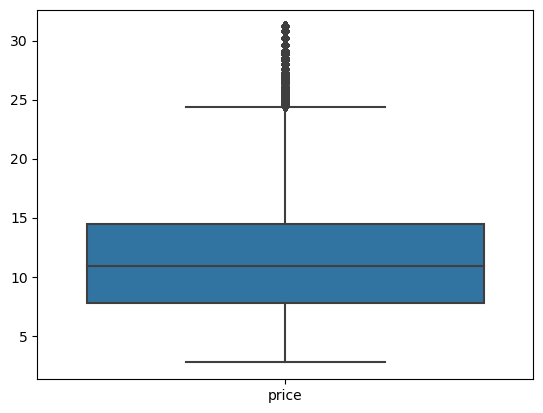

In [67]:
sns.boxplot(df[['price']])


<Axes: >

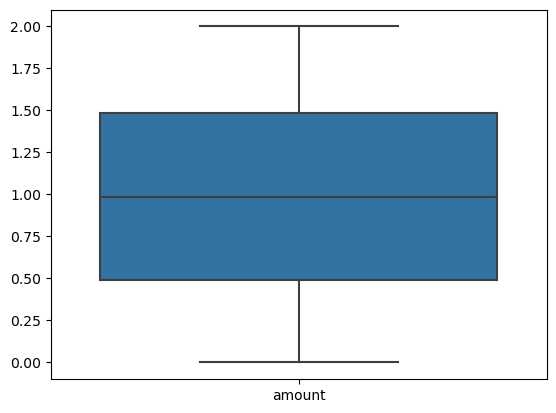

In [68]:
sns.boxplot(df[['amount']])

In [69]:
df.describe()

,price,amount,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
count,530979.000000,530979.000000,530979.000000,530979.000000,530979.000000,530979.000000,530979.000000,530979.000000,530979.000000
mean,11.823808,0.987877,6.196386,15.665563,2216.874554,3.003162,2.401116,15.665563,25.119391
std,5.440183,0.576173,3.351281,8.774475,0.802739,1.997013,1.085384,8.774475,14.571822
min,2.730000,0.000001,1.000000,1.000000,2216.000000,0.000000,1.000000,1.000000,1.000000
25%,7.800000,0.488293,3.000000,8.000000,2216.000000,1.000000,1.000000,8.000000,13.000000
50%,10.890000,0.982342,6.000000,16.000000,2217.000000,3.000000,2.000000,16.000000,25.000000
75%,14.440000,1.483830,9.000000,23.000000,2218.000000,5.000000,3.000000,23.000000,37.000000
max,31.200000,1.999999,12.000000,31.000000,2218.000000,6.000000,4.000000,31.000000,52.000000


In [70]:
threshold = 3
columns = ['price', 'amount']

In [71]:
for col in columns:

    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    df = df[z_scores < threshold].copy()

In [72]:
df.describe()

,price,amount,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
count,527244.000000,527244.000000,527244.000000,527244.000000,527244.000000,527244.000000,527244.000000,527244.000000,527244.000000
mean,11.697928,0.987911,6.184294,15.664241,2216.866582,3.003342,2.397086,15.664241,25.063657
std,5.248277,0.576219,3.359212,8.774178,0.799949,1.997000,1.088066,8.774178,14.604527
min,2.730000,0.000001,1.000000,1.000000,2216.000000,0.000000,1.000000,1.000000,1.000000
25%,7.780000,0.488311,3.000000,8.000000,2216.000000,1.000000,1.000000,8.000000,12.000000
50%,10.870000,0.982337,6.000000,16.000000,2217.000000,3.000000,2.000000,16.000000,25.000000
75%,14.390000,1.484034,9.000000,23.000000,2218.000000,5.000000,3.000000,23.000000,37.000000
max,28.030000,1.999999,12.000000,31.000000,2218.000000,6.000000,4.000000,31.000000,52.000000


<Axes: >

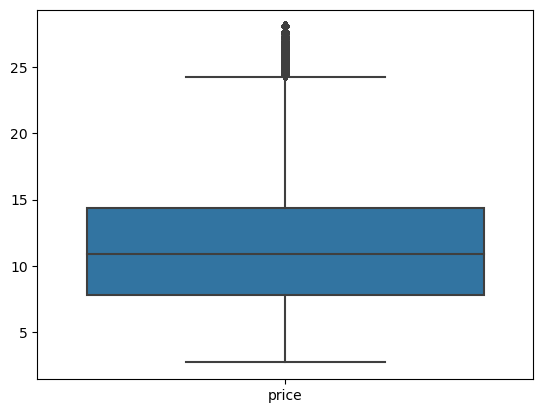

In [73]:
sns.boxplot(df[['price']])

<Axes: >

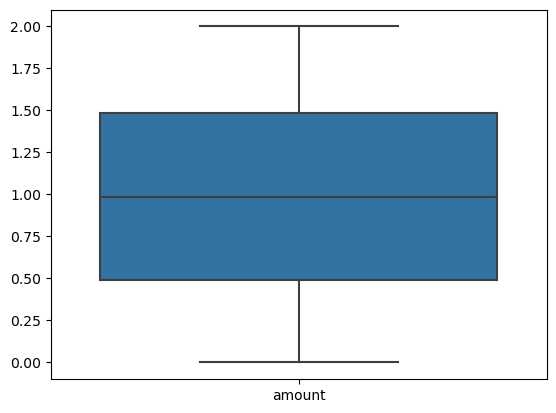

In [74]:
sns.boxplot(df[['amount']])

In [75]:
print('Количество строк в датафрейме после обработки данных:' ,len(df))

Количество строк в датафрейме после обработки данных: 527244


In [76]:
df[['price', 'amount']]

,price,amount
0,3.90,0.550319
1,3.90,1.983822
2,3.90,1.765940
3,3.90,0.743802
4,3.90,0.550320
...,...,...
700296,9.41,0.402220
700297,9.41,1.565969
700298,9.41,1.918324
700300,9.41,0.266523


<Axes: xlabel='datetime', ylabel='Density'>

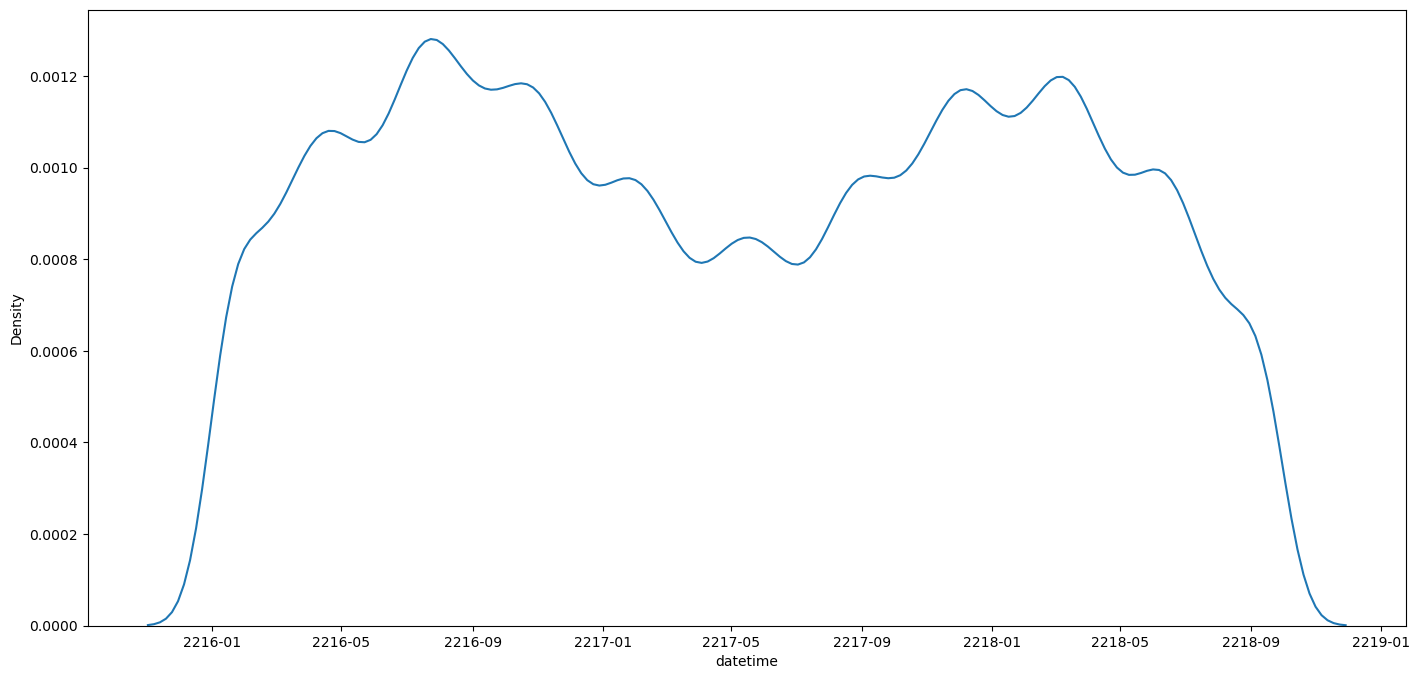

In [77]:
plt.figure(figsize=(17,8))
sns.kdeplot(df['datetime'])


In [78]:
df[df['datetime']>'2218-09-27 14:50:00']

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
54321,Целебные травы,13.63,1.581299,Анор Лондо,2218-09-27 16:38:00,9,27,2218,6,3,27,39
54322,Целебные травы,13.63,0.974788,Анор Лондо,2218-09-27 16:53:00,9,27,2218,6,3,27,39
54323,Целебные травы,13.63,1.905893,Анор Лондо,2218-09-27 17:28:00,9,27,2218,6,3,27,39
54324,Целебные травы,13.63,0.113811,Анор Лондо,2218-09-27 18:15:00,9,27,2218,6,3,27,39
54325,Целебные травы,13.63,1.507757,Анор Лондо,2218-09-27 18:26:00,9,27,2218,6,3,27,39
...,...,...,...,...,...,...,...,...,...,...,...,...
684075,Эстус,20.33,0.847835,Врата Балдура,2218-09-27 20:29:00,9,27,2218,6,3,27,39
684076,Эстус,20.33,0.493500,Врата Балдура,2218-09-27 21:17:00,9,27,2218,6,3,27,39
684077,Эстус,20.33,0.581086,Врата Балдура,2218-09-27 22:10:00,9,27,2218,6,3,27,39
684078,Эстус,20.33,1.460196,Врата Балдура,2218-09-27 22:11:00,9,27,2218,6,3,27,39


In [79]:
result = df.groupby('place')[['datetime']].count() / len(df)
result


,datetime
place,
Анор Лондо,0.245012
Врата Балдура,0.203274
Кеджистан,0.192524
Нокрон,0.176510
Фалькония,0.182680


In [80]:
result = df.groupby('place')[['amount']].sum()
result


,amount
place,
Анор Лондо,127465.680917
Врата Балдура,105407.491831
Кеджистан,100370.820967
Нокрон,92215.857012
Фалькония,95410.416439


In [81]:
result = df[df['datetime']>'2218-09-27 14:50:00'].groupby('place')[['datetime']].count() / len(df[df['datetime']>'2218-09-27 14:50:00'])
result


,datetime
place,
Анор Лондо,0.298913
Врата Балдура,0.250000
Кеджистан,0.092391
Нокрон,0.168478
Фалькония,0.190217


In [82]:
result = df[df['datetime']>'2218-09-27 14:50:00'].groupby('place')[['amount']].sum() / len(df[df['datetime']>'2218-09-27 14:50:00'])
result


,amount
place,
Анор Лондо,0.291658
Врата Балдура,0.239579
Кеджистан,0.100985
Нокрон,0.189678
Фалькония,0.181995


In [83]:
df['amount']

0         0.550319
1         1.983822
2         1.765940
3         0.743802
4         0.550320
            ...   
700296    0.402220
700297    1.565969
700298    1.918324
700300    0.266523
700301    1.676137
Name: amount, Length: 527244, dtype: float64

In [84]:
df_sebe = pd.read_parquet("df_cost.parquet")

In [85]:
df_sebe

,place,product,cost,date
0,Анор Лондо,Целебные травы,2.07,2216-01-02
1,Анор Лондо,Целебные травы,3.07,2216-01-26
2,Анор Лондо,Целебные травы,3.30,2216-02-12
3,Анор Лондо,Целебные травы,4.04,2216-03-06
4,Анор Лондо,Целебные травы,3.88,2216-03-27
...,...,...,...,...
1112,Фалькония,Эстус,3.10,2218-07-29
1113,Фалькония,Эстус,7.20,2218-08-10
1114,Фалькония,Эстус,3.31,2218-08-27
1115,Фалькония,Эстус,3.26,2218-09-16


In [86]:
df

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00,1,2,2216,1,1,2,1
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00,1,2,2216,1,1,2,1
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00,1,2,2216,1,1,2,1
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00,1,2,2216,1,1,2,1
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00,1,2,2216,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
700296,Эстус,9.41,0.402220,Кеджистан,2216-09-24 05:55:00,9,24,2216,1,3,24,39
700297,Эстус,9.41,1.565969,Кеджистан,2216-09-24 06:43:00,9,24,2216,1,3,24,39
700298,Эстус,9.41,1.918324,Кеджистан,2216-09-24 07:25:00,9,24,2216,1,3,24,39
700300,Эстус,9.41,0.266523,Кеджистан,2216-09-24 07:58:00,9,24,2216,1,3,24,39


<Axes: >

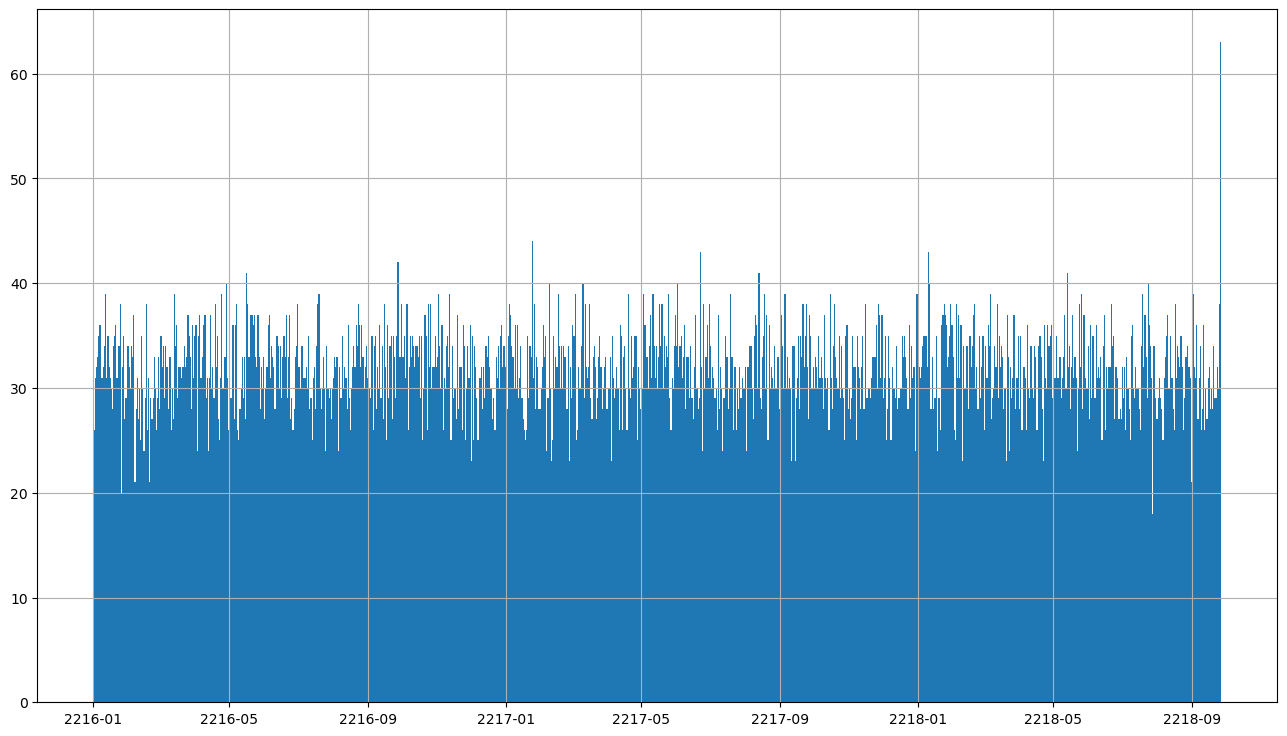

In [87]:
df2['date'].hist(bins = 999, figsize=(16,9))

<Axes: >

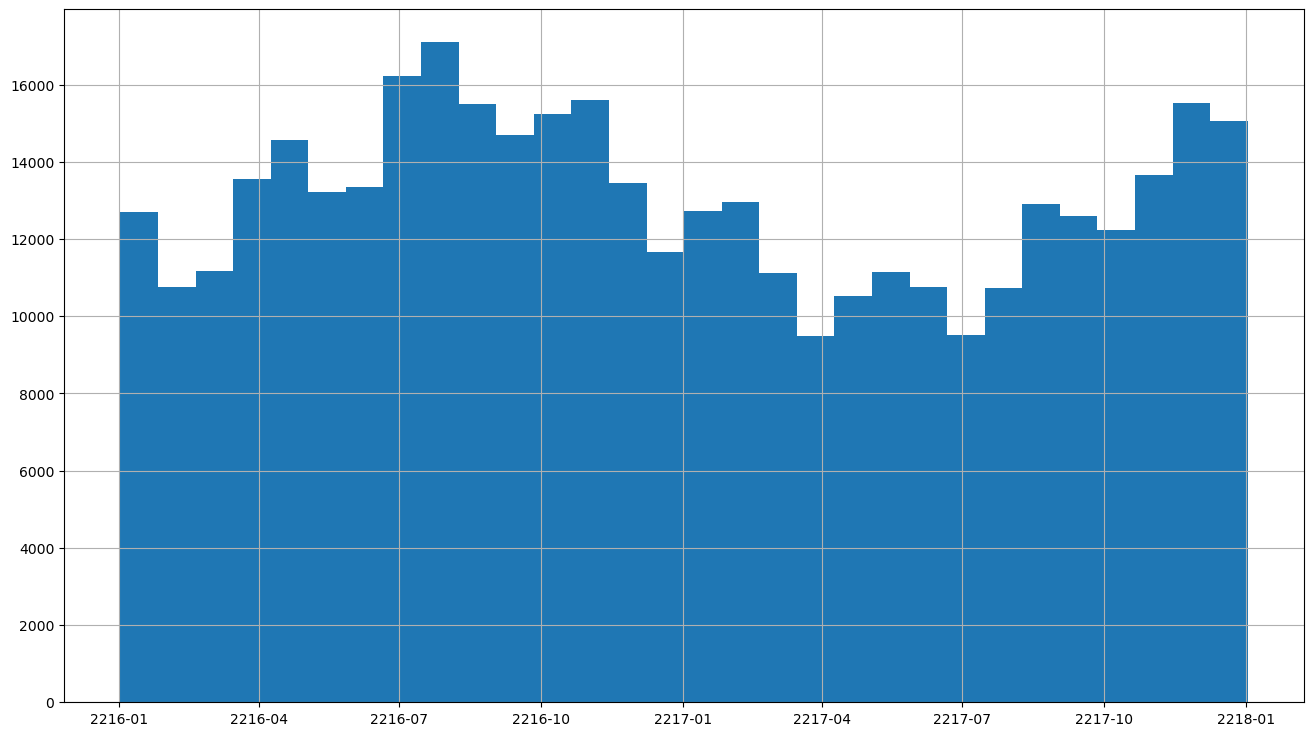

In [88]:
df[df['datetime']<'2218-01-02 05:33:00']['datetime'].hist(bins = 30, figsize=(16,9))

In [89]:
df.drop_duplicates()

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02 00:49:00,1,2,2216,1,1,2,1
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02 01:55:00,1,2,2216,1,1,2,1
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02 01:58:00,1,2,2216,1,1,2,1
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02 02:01:00,1,2,2216,1,1,2,1
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02 02:30:00,1,2,2216,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
700296,Эстус,9.41,0.402220,Кеджистан,2216-09-24 05:55:00,9,24,2216,1,3,24,39
700297,Эстус,9.41,1.565969,Кеджистан,2216-09-24 06:43:00,9,24,2216,1,3,24,39
700298,Эстус,9.41,1.918324,Кеджистан,2216-09-24 07:25:00,9,24,2216,1,3,24,39
700300,Эстус,9.41,0.266523,Кеджистан,2216-09-24 07:58:00,9,24,2216,1,3,24,39


In [90]:
df[df['amount']<=0]

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear


In [91]:
df[df['price']<=0]

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear


In [92]:
len(df[df['datetime']<'2216-01-02 05:33:00']['datetime'])

122

In [93]:
df['datetime'] = pd.to_datetime(df['datetime']).dt.date

In [94]:
# df = df.groupby(['datetime', 'place']).agg({'price': 'mean', 'amount': 'sum'}).reset_index().copy()
# df

In [95]:
# df['datetime'] = pd.to_datetime(df['datetime'])

In [96]:
# # Создайте график
# plt.figure(figsize=(10, 6))
# plt.plot(df['datetime'], df['price'], marker='o', linestyle='-', color='b')
# # Настройте оси и заголовок
# plt.xlabel('Дата')
# plt.ylabel('Цена')
# plt.title('График цен по датам')

In [97]:
df

,product,price,amount,place,datetime,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,Целебные травы,3.90,0.550319,Анор Лондо,2216-01-02,1,2,2216,1,1,2,1
1,Целебные травы,3.90,1.983822,Анор Лондо,2216-01-02,1,2,2216,1,1,2,1
2,Целебные травы,3.90,1.765940,Анор Лондо,2216-01-02,1,2,2216,1,1,2,1
3,Целебные травы,3.90,0.743802,Анор Лондо,2216-01-02,1,2,2216,1,1,2,1
4,Целебные травы,3.90,0.550320,Анор Лондо,2216-01-02,1,2,2216,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
700296,Эстус,9.41,0.402220,Кеджистан,2216-09-24,9,24,2216,1,3,24,39
700297,Эстус,9.41,1.565969,Кеджистан,2216-09-24,9,24,2216,1,3,24,39
700298,Эстус,9.41,1.918324,Кеджистан,2216-09-24,9,24,2216,1,3,24,39
700300,Эстус,9.41,0.266523,Кеджистан,2216-09-24,9,24,2216,1,3,24,39


## Предикт

In [98]:
df_baseline = []
for (place, product), place_product_df in df.groupby(["place", "product"]):
    temp_df = pd.DataFrame(range(1, 91), columns=["day_num"])
    temp_df["place"] = place
    temp_df["product"] = product
    temp_df["price"] = place_product_df.sort_values("datetime").iloc[-1]["price"]
    df_baseline.append(temp_df)
df_baseline = pd.concat(df_baseline)

In [99]:
df_pred = df_baseline.drop(columns = 'price')

In [100]:
model_for_price = CatBoostRegressor(cat_features=cat_feat,
    iterations=250, 
    learning_rate=0.2,
    depth = 3,
    early_stopping_rounds=250,
    loss_function='RMSE'
)
# Fit model
model_for_price.fit(X_train, y_train,  
        eval_set=(X_val, y_val), 
        verbose=True
)


0:	learn: 0.5761706	test: 0.5778284	best: 0.5778284 (0)	total: 177ms	remaining: 44.1s
1:	learn: 0.5761683	test: 0.5778295	best: 0.5778284 (0)	total: 275ms	remaining: 34.1s
2:	learn: 0.5761646	test: 0.5778304	best: 0.5778284 (0)	total: 349ms	remaining: 28.7s
3:	learn: 0.5761632	test: 0.5778305	best: 0.5778284 (0)	total: 516ms	remaining: 31.7s
4:	learn: 0.5761632	test: 0.5778305	best: 0.5778284 (0)	total: 575ms	remaining: 28.2s
5:	learn: 0.5761625	test: 0.5778313	best: 0.5778284 (0)	total: 624ms	remaining: 25.4s
6:	learn: 0.5761563	test: 0.5778350	best: 0.5778284 (0)	total: 692ms	remaining: 24s
7:	learn: 0.5761561	test: 0.5778350	best: 0.5778284 (0)	total: 757ms	remaining: 22.9s
8:	learn: 0.5761557	test: 0.5778350	best: 0.5778284 (0)	total: 840ms	remaining: 22.5s
9:	learn: 0.5761551	test: 0.5778351	best: 0.5778284 (0)	total: 918ms	remaining: 22s
10:	learn: 0.5761545	test: 0.5778358	best: 0.5778284 (0)	total: 987ms	remaining: 21.4s
11:	learn: 0.5761530	test: 0.5778362	best: 0.5778284 (0)	

In [101]:
model_for_price.predict(df_pred)

CatBoostError: Invalid cat_features[2] = 4 value: index must be < 3.

In [ ]:
df_pred

,day_num,place,product
0,1,Анор Лондо,Целебные травы
1,2,Анор Лондо,Целебные травы
2,3,Анор Лондо,Целебные травы
3,4,Анор Лондо,Целебные травы
4,5,Анор Лондо,Целебные травы
...,...,...,...
85,86,Фалькония,Эльфийская пыльца
86,87,Фалькония,Эльфийская пыльца
87,88,Фалькония,Эльфийская пыльца
88,89,Фалькония,Эльфийская пыльца


In [ ]:
df_pred.to_parquet("df_pred.parquet")